In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
# %matplotlib inline
from skimage.io import imread, imshow

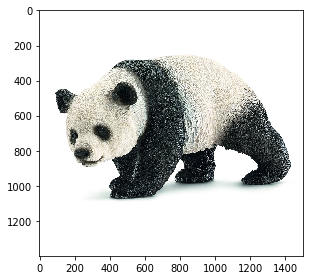

In [ ]:
# Loading the image

# from google.colab import drive
# drive.mount('/content/drive')
path = "/content/drive/MyDrive/Files/panda.jpg"

image1 = imread(path, as_gray = False)
imshow(image1);

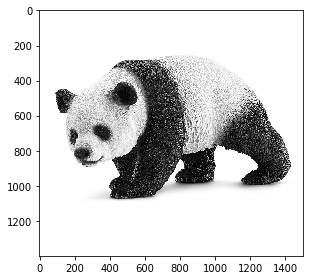

In [ ]:
# Converting to Grayscale
image2 = imread(path, as_gray = True)
imshow(image2);

In [ ]:
# Analyzing both images

# Shape of image 1
print('Image 1 Shape : ', image1.shape, '\n')
image1

Image 1 Shape :  (1399, 1500, 3) 



array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
# Shape of image 2
print('Image 2 Shape : ', image2.shape, '\n')
image2

Image 2 Shape :  (1399, 1500) 



array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
# Size of images
print(image1.size)
print(image2.size)

6295500
2098500


In [ ]:
# Feature Extraction

# Method #1 : Grayscale Pixel Values as Features

# Pixel Features for Image 1
pixel_feat1 = np.reshape(image1, (1399*1500*3))
pixel_feat1.shape, pixel_feat1

((6295500,), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8))

In [ ]:
# Pixel Features for Image 2
pixel_feat2 = np.reshape(image2, (1399*1500))
pixel_feat2.shape, pixel_feat2

((2098500,), array([1., 1., 1., ..., 1., 1., 1.]))

In [ ]:
# Method #2 : Mean Pixel Value of Channels
feature_matrix = np.zeros((1399,1500)) 
feature_matrix.shape


for i in range(0,image1.shape[0]):
    for j in range(0,image1.shape[1]):
        feature_matrix[i][j] = ((int(image1[i,j,0]) + int(image1[i,j,1]) + int(image1[i,j,2]))/3)

features = np.reshape(feature_matrix, (1399*1500)) 
features.shape

(2098500,)

In [ ]:
# Method #3 : Extracting Edge Features

import numpy as np
from skimage.io import imread, imshow
from skimage import filters
from skimage import feature
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image2)

#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image2)

# calculating Sobel Kernel
ed_sobel = filters.sobel(image2)

# calculating canny algorithm
canny = feature.canny(image2)

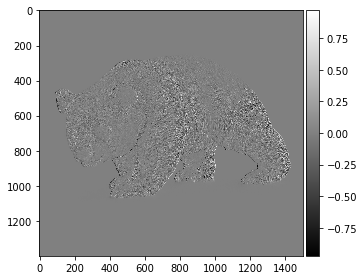

In [ ]:
imshow(edges_prewitt_vertical, cmap = 'gray')

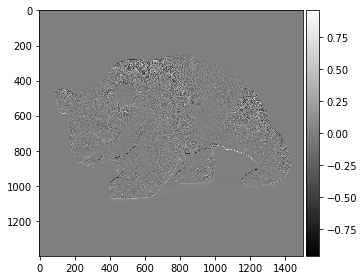

In [ ]:
imshow(edges_prewitt_horizontal, cmap = 'gray')

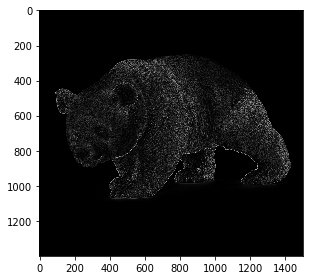

In [ ]:
imshow(ed_sobel, cmap = 'gray')

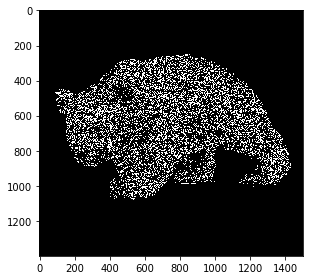

In [ ]:
imshow(canny, cmap = 'gray')

Text(0.5, 1.0, 'histogram of gray values')

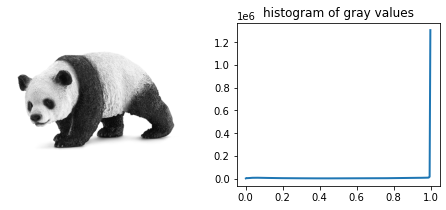

In [ ]:
# Method #4 : Region Based Segmentations

from skimage.exposure import histogram
hist, hist_centers = histogram(image2)

#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image2, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')